In [2]:
import gudhi as gd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [62]:
colnames = ['Date','Open','High', 'Low','Close']

DJIA = pd.read_csv('/home/alex/Desktop/Python/Project TDA/DJIA.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
NASDAQ = pd.read_csv('/home/alex/Desktop/Python/Project TDA/NASDAQ.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
Russel2000 = pd.read_csv('/home/alex/Desktop/Python/Project TDA/Russel2000.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
SP500 = pd.read_csv('/home/alex/Desktop/Python/Project TDA/S&P500.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)

/tmp/ipykernel_32756/2060131822.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DJIA = pd.read_csv('/home/alex/Desktop/Python/Project TDA/DJIA.csv', parse_dates = ['Date'], index_col= ['Date'], names = colnames, header = 0)
/tmp/ipykernel_32756/2060131822.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NASDAQ = pd.read_csv('/home/alex/Desktop/Python/Project TDA/NASDAQ.csv', parse_dates = ['Date'], index_col= 'Date', names = colnames, header = 0)
/tmp/ipykernel_32756/2060131822.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Russel2000 = pd.read_csv('/home/alex/D

First look at the data

In [70]:
print(DJIA.dtypes)
print(DJIA.head(10))
print(DJIA.info())
print(DJIA.describe())
print(DJIA['Open'].head())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
                Open      High       Low     Close
Date                                              
2016-12-08  19559.94  19664.97  19527.83  19614.81
2016-12-07  19241.99  19558.42  19229.83  19549.62
2016-12-06  19219.91  19255.89  19184.74  19251.78
2016-12-05  19244.35  19274.85  19186.73  19216.24
2016-12-02  19161.25  19196.14  19141.18  19170.42
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
               Open          High           Low         Close
count   7301.000000   7301.000000   7301.000000   7301.000000
mean    9106.946302   9187.664472   9024.536

In [72]:
print(NASDAQ.dtypes)
print(NASDAQ.head())
print(NASDAQ.info())
print(NASDAQ.describe())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
               Open     High      Low    Close
Date                                          
2016-12-08  5394.15  5425.52  5389.09  5417.36
2016-12-07  5322.67  5397.93  5307.31  5393.76
2016-12-06  5317.74  5333.99  5299.94  5333.00
2016-12-05  5283.58  5321.09  5269.57  5308.89
2016-12-02  5249.02  5274.54  5239.27  5255.65
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
              Open         High          Low        Close
count  7301.000000  7301.000000  7301.000000  7301.000000
mean   2046.870311  2061.073413  2030.224668  2046.467548
std    1308.163397  13

In [71]:
print(Russel2000.dtypes)
print(Russel2000.head())
print(Russel2000.info())
print(Russel2000.describe())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
               Open     High      Low    Close
Date                                          
2016-12-08  1364.43  1386.45  1363.70  1386.37
2016-12-07  1352.10  1366.61  1347.84  1364.51
2016-12-06  1338.05  1353.57  1334.30  1352.67
2016-12-05  1314.98  1338.23  1314.98  1337.79
2016-12-02  1313.58  1319.35  1311.52  1314.25
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
              Open         High          Low        Close
count  7301.000000  7301.000000  7301.000000  7301.000000
mean    541.717928   545.180662   537.786113   541.786253
std     310.315540   3

In [73]:
print(SP500.dtypes)
print(SP500.head())
print(SP500.info())
print(SP500.describe())

Open     float64
High     float64
Low      float64
Close    float64
dtype: object
               Open     High      Low    Close
Date                                          
2016-12-08  2241.13  2251.69  2237.57  2246.19
2016-12-07  2210.72  2241.63  2208.93  2241.35
2016-12-06  2207.26  2212.78  2202.21  2212.23
2016-12-05  2200.65  2209.42  2199.97  2204.71
2016-12-02  2191.12  2197.95  2188.37  2191.95
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7301 entries, 2016-12-08 to 1987-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7301 non-null   float64
 1   High    7301 non-null   float64
 2   Low     7301 non-null   float64
 3   Close   7301 non-null   float64
dtypes: float64(4)
memory usage: 285.2 KB
None
              Open         High          Low        Close
count  7301.000000  7301.000000  7301.000000  7301.000000
mean   1048.154324  1054.463034  1041.160730  1048.282880
std     515.807862   5

There is NO MISSING VALUES in any of the 4 DataFrames.
We focus on the closing prices.
We create a DataFrame "close" which contains the 4 closing columns. We sort this new DataFrame by ascending date.
We draw a few plots: one overall and 2 separated plots around the crashes dates.

In [125]:
close = pd.concat([DJIA['Close'],NASDAQ['Close'],Russel2000['Close'],SP500['Close']], axis = 1)
close.columns = ['DJIA', 'NASDAQ','Russel2000', 'SP500']
close.sort_index(inplace = True)
print(close.head())

               DJIA  NASDAQ  Russel2000   SP500
Date                                           
1987-12-23  2005.64  331.48      120.80  253.16
1987-12-24  1999.67  333.19      121.59  252.02
1987-12-28  1942.97  325.60      119.00  245.57
1987-12-29  1926.89  325.53      118.30  244.59
1987-12-30  1950.10  329.70      119.50  247.86


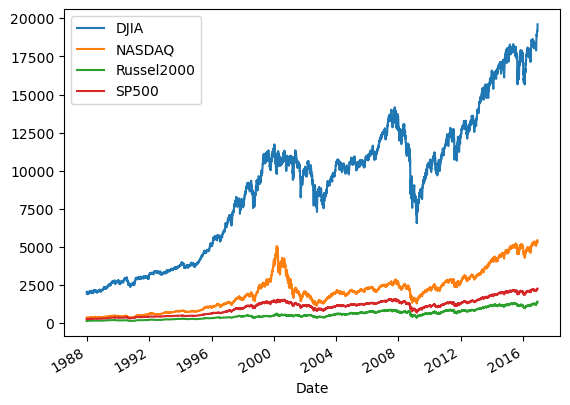

In [126]:
close.plot()
plt.show()

We are interested in the dotcom crash on 03/10/2000 and to the Lehman bankruptcy on 09/15/2008. Let's plot around these dates.

In [1]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

close['2000-02-01':'2000-06-01']['DJIA'].plot(ax = axs[0,0])
close['2000-02-01':'2000-06-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
close['2000-02-01':'2000-06-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
close['2000-02-01':'2000-06-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

NameError: name 'plt' is not defined

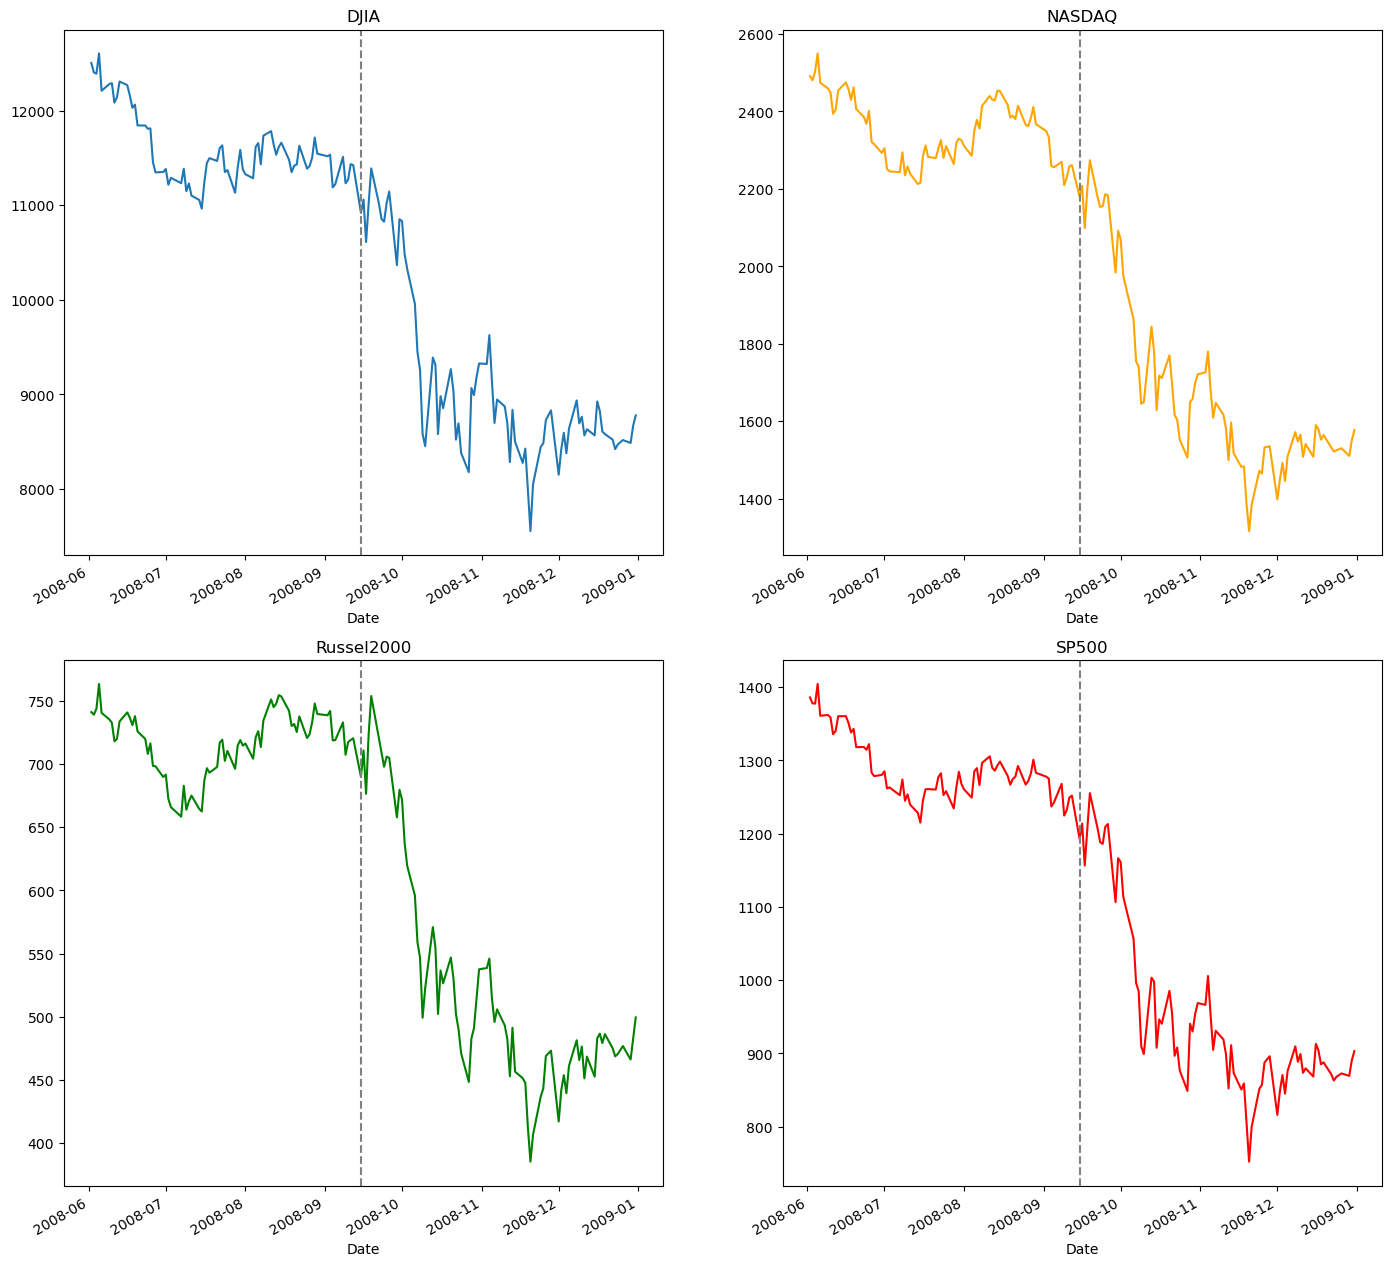

In [128]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

close['2008-06-01':'2009-01-01']['DJIA'].plot(ax = axs[0,0])
close['2008-06-01':'2009-01-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
close['2008-06-01':'2009-01-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
close['2008-06-01':'2009-01-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

For each index and for each trading day we calculate log-returns defined as the forward daily changes in the logarithm of the ratio $$r_{i,j} = ln(\frac{P_{i,j}}{P_{i-1,j}}),$$ where $P_{i,j}$ represents theadjusted closing value of the index $j$ at the day $i$.

We name this new DataFrame 'ratio' and draw plots from this table.

                DJIA    NASDAQ  Russel2000     SP500
Date                                                
1987-12-24 -0.002981  0.005145    0.006518 -0.004513
1987-12-28 -0.028764 -0.023043   -0.021531 -0.025926
1987-12-29 -0.008310 -0.000215   -0.005900 -0.003999
1987-12-30  0.011973  0.012729    0.010093  0.013281
1987-12-31 -0.005796  0.002333    0.007669 -0.003152


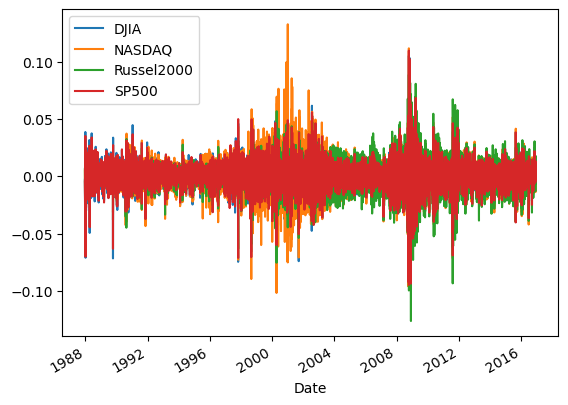

In [147]:
ratio = np.log(close.pct_change().dropna() +1)
print(ratio.head())
ratio.plot()
plt.show()

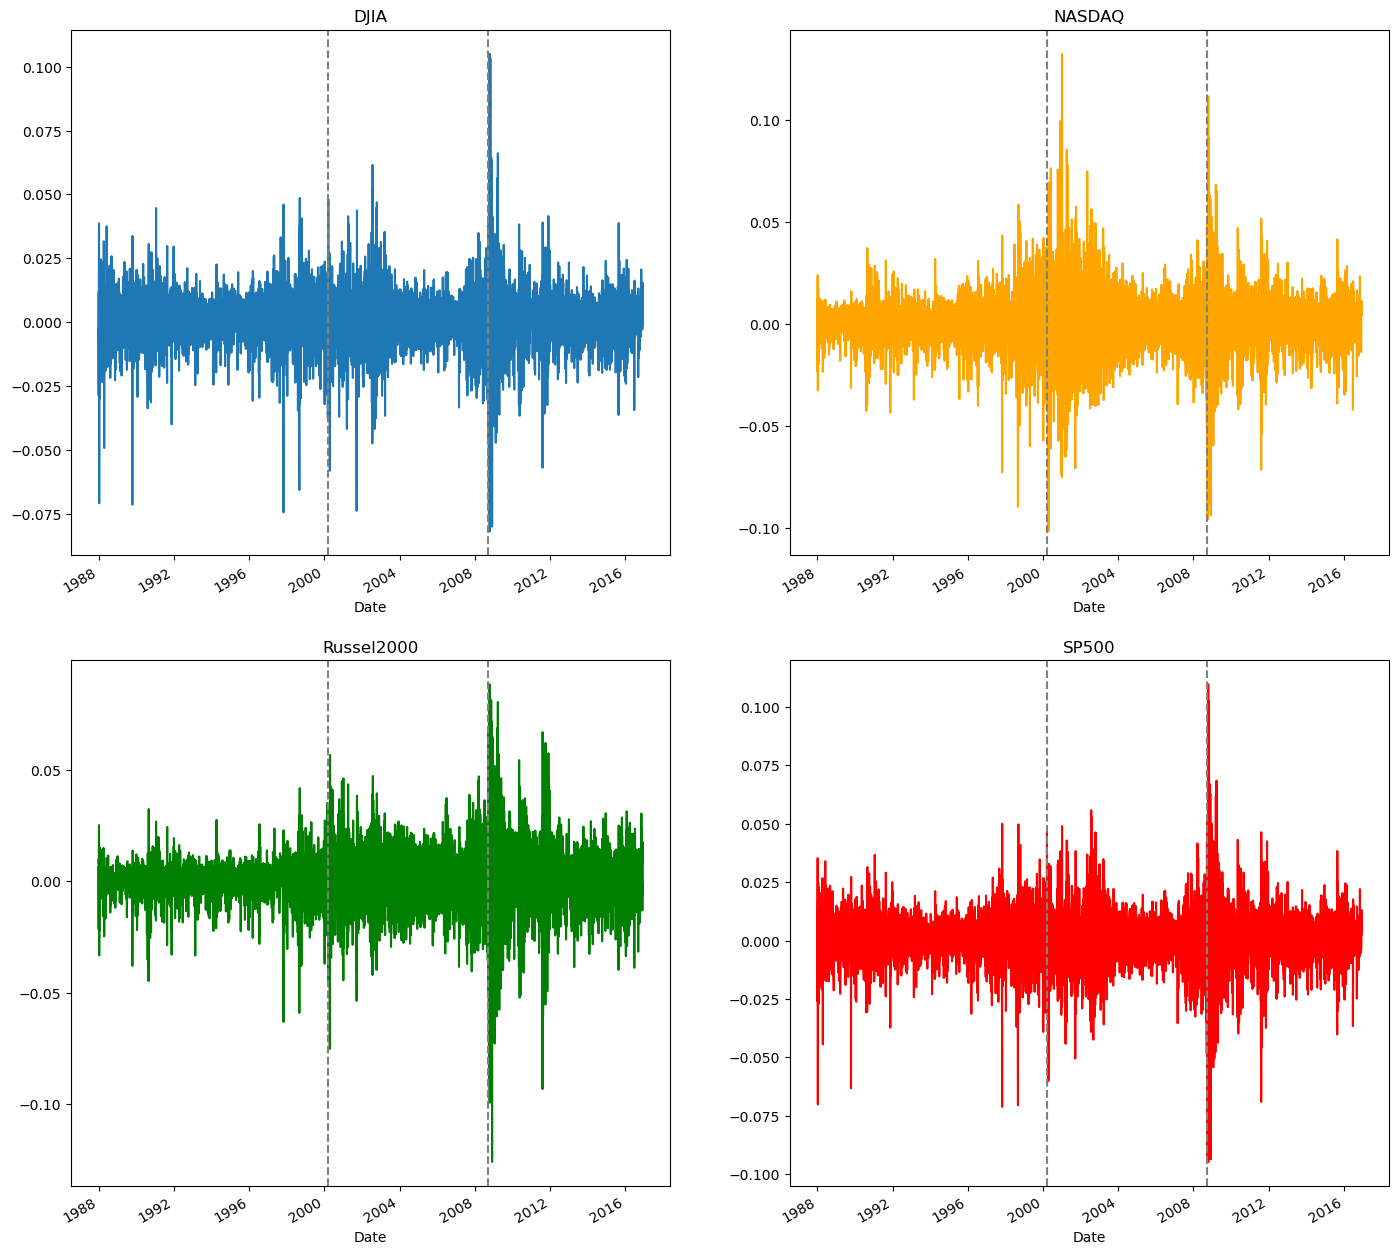

In [145]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio['DJIA'].plot(ax = axs[0,0])
ratio['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

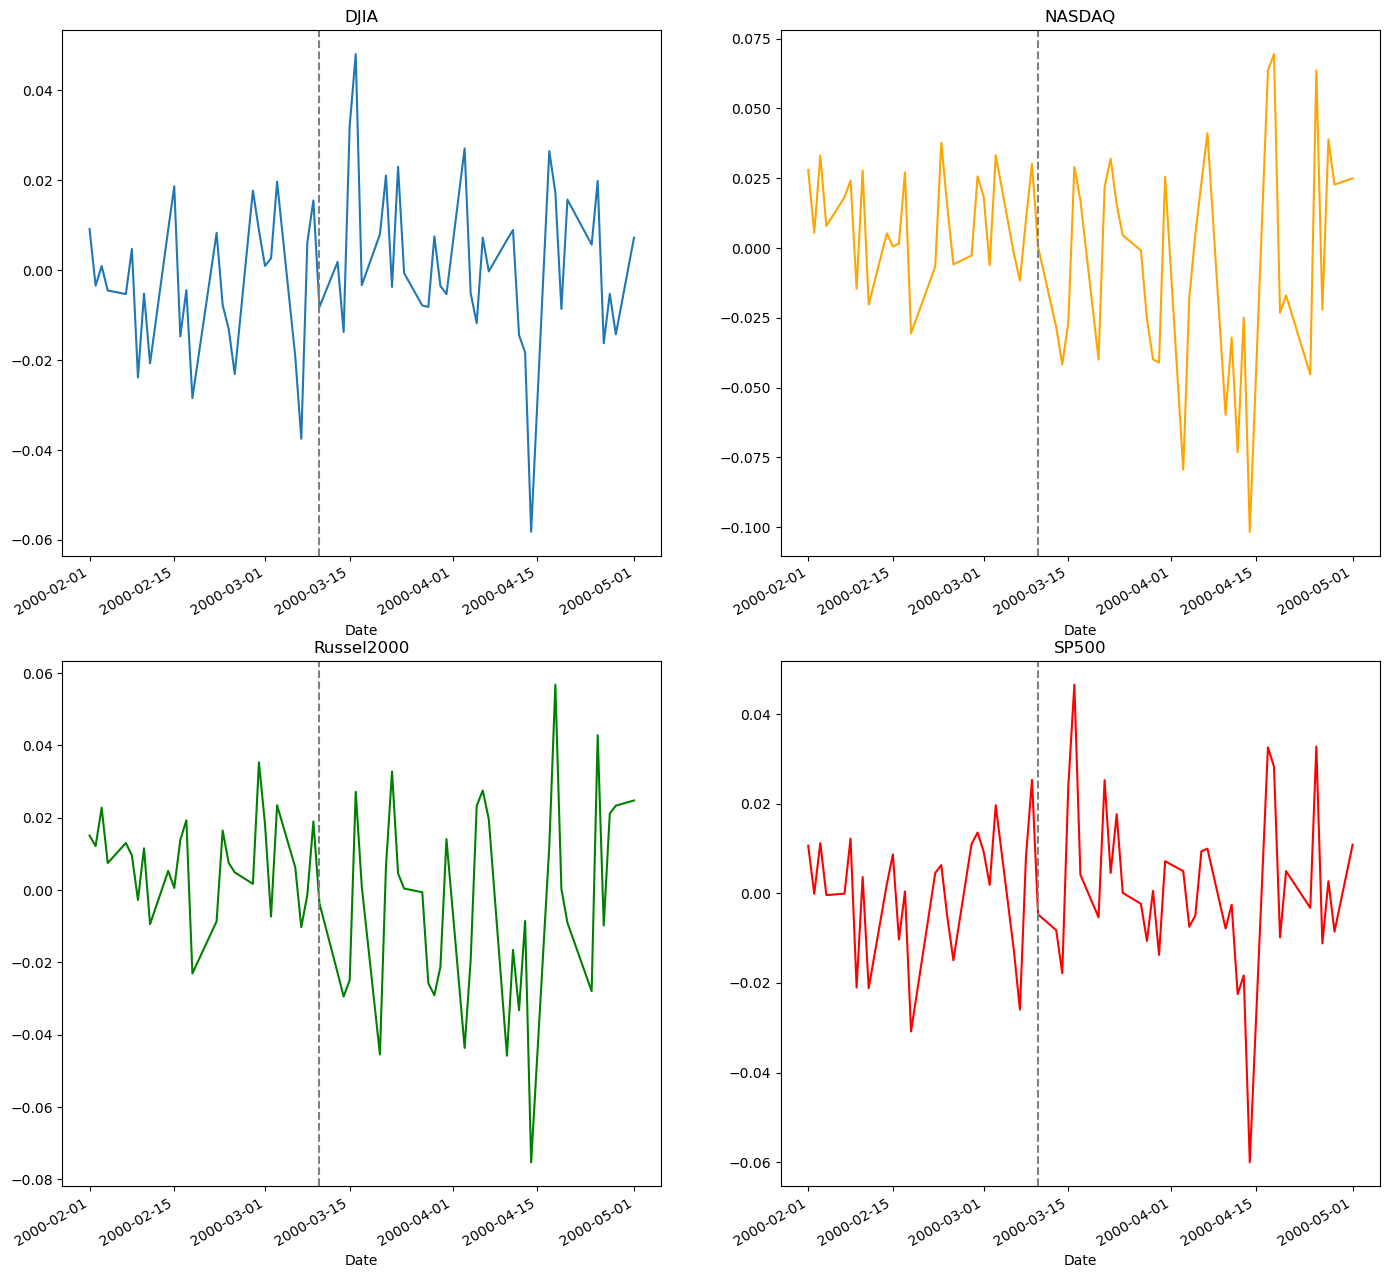

In [148]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio['2000-02-01':'2000-05-01']['DJIA'].plot(ax = axs[0,0])
ratio['2000-02-01':'2000-05-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio['2000-02-01':'2000-05-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio['2000-02-01':'2000-05-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2000-03-10', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

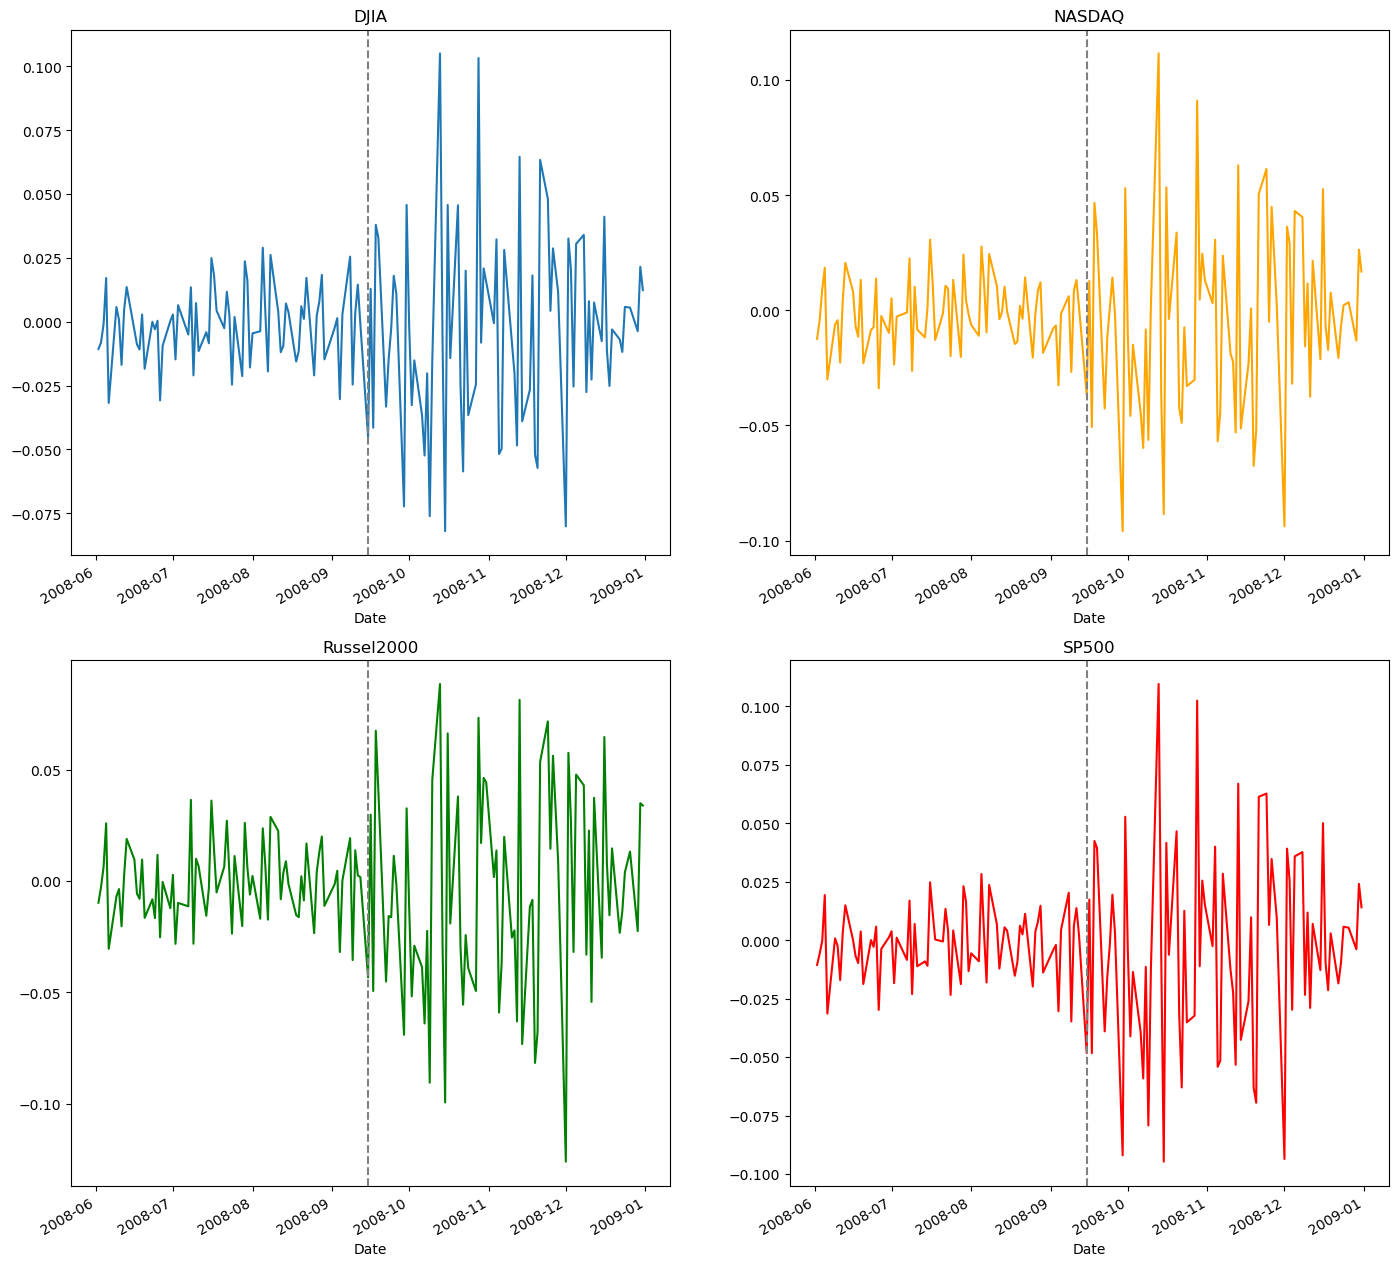

In [149]:
fig, axs = plt.subplots(2,2, figsize = (17,17))

ratio['2008-06-01':'2009-01-01']['DJIA'].plot(ax = axs[0,0])
ratio['2008-06-01':'2009-01-01']['NASDAQ'].plot(ax = axs[0,1], c = 'orange')
ratio['2008-06-01':'2009-01-01']['Russel2000'].plot(ax = axs[1,0], c = 'g')
ratio['2008-06-01':'2009-01-01']['SP500'].plot(ax = axs[1,1], c = 'r')


for i in [0,1]:
    for j in [0,1]:
        axs[i,j].axvline(x = '2008-09-15', color = 'grey', linestyle = '--')
        axs[i,j].set_title(close.columns[j+2*i])
plt.show()

A bit weird, we don't really notice anything happening on these plots